<a href="https://colab.research.google.com/github/Lakshya1701/IPL-Predictor/blob/main/SVM_Group_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #for visualizing data
from sklearn import datasets #for retrieving datasets
from sklearn.model_selection import train_test_split #for training data
from sklearn import svm #library for SVM
from mlxtend.plotting import plot_decision_regions #to visulaize decsion boundaries

In [ ]:
%matplotlib inline

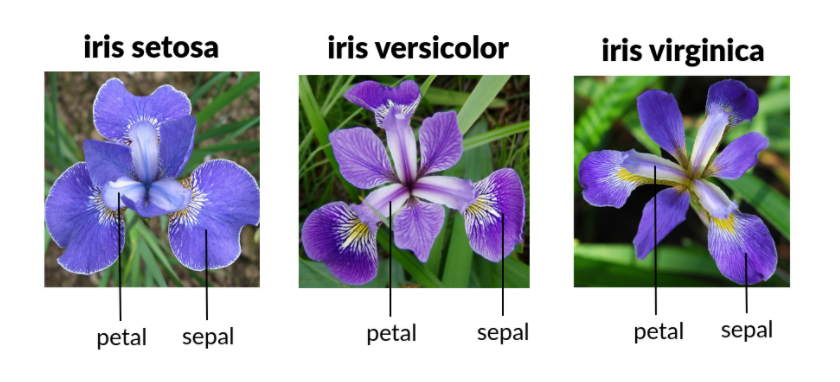

In [ ]:
 #taking iris dataset from the seaborn library and storing it as iris_1
iris_1=sns.load_dataset('iris')

In [ ]:
iris_1.head() #visualizing the first 5 rows of the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_1.shape #number of rows and columns

(150, 5)

We wish to find which class of the flower species seems more seperable

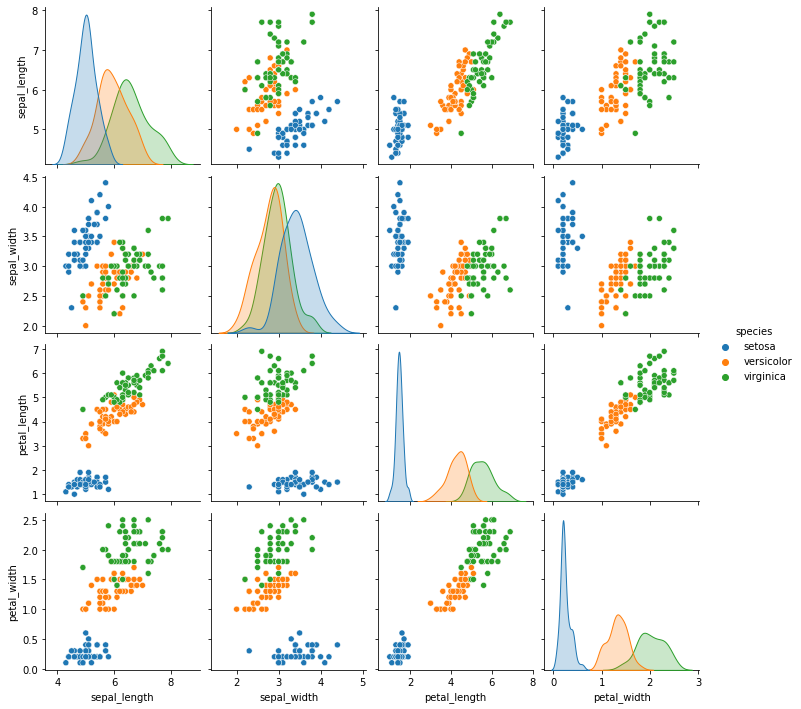

In [ ]:
sns.pairplot(iris_1,hue='species')

**The  blue class can be seen to have a different cluster itself. and the orange and green class are somewhat overlapping**

# Two Class Classification Problem

In [ ]:
df_new=iris_1[iris_1["species"].str.contains("setosa") == False] #dropping rows containing the species setosa
df_new.shape[0] #no of rows

100

In [ ]:
df_new.shape

(100, 5)

In [ ]:
sepal_length=df_new.iloc[ :,0] #Model is trained on two features related to length
petal_length=df_new.iloc[ :,2]
X=np.column_stack((sepal_length,petal_length)) #two features used for input 
y=np.array(df_new['species']) #output variable
d = { 'versicolor':0, 'virginica':1}
y = np.array(list(map(lambda i : d[i], y)))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)#splitting dataset
clf=svm.SVC(kernel='linear',C=1) #support vector machine classifier
clf.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [ ]:
clf.score(X_train,y_train)

0.9428571428571428

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


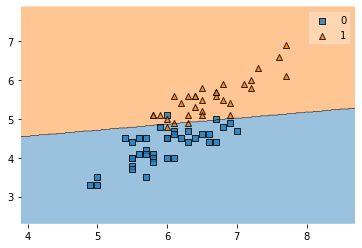

In [ ]:
plot_decision_regions(X=X_train,y=y_train,clf=clf,legend=1)

In [ ]:
clf.score(X_test,y_test)

0.9333333333333333

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


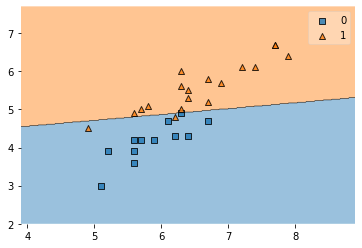

In [ ]:
plot_decision_regions(X=X_test,y=y_test,clf=clf,legend=1)

In [ ]:
predictions=clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[12  0]
 [ 2 16]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.89      0.94        18

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30



# Three Class Classification Problem

In [ ]:
sepal_length=iris_1.iloc[ :,0]
petal_length=iris_1.iloc[ :,2]

In [ ]:
X=np.column_stack((sepal_length,petal_length)) #two features used for input 
y=np.array(iris_1['species']) #output variable
d = {'setosa':0, 'versicolor':1, 'virginica':2} #encoding the categorical variables as class 0,1,2
y = np.array(list(map(lambda i : d[i], y)))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
clf=svm.SVC(kernel='linear',C=1)
clf.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [ ]:
clf.score(X_train,y_train)

0.9809523809523809

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


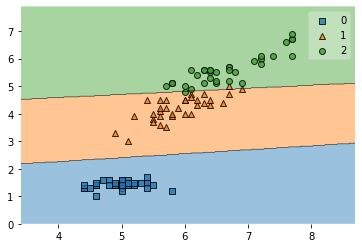

In [ ]:
plot_decision_regions(X=X_train,y=y_train,clf=clf,legend=1)

In [ ]:
clf.score(X_test,y_test)

0.8888888888888888

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


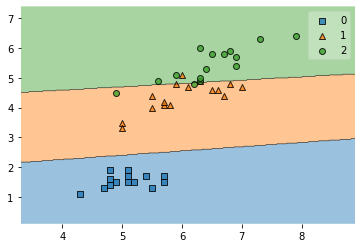

In [ ]:
plot_decision_regions(X=X_test,y=y_test,clf=clf,legend=1)

Model Evaluation

In [ ]:
predictions=clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[14  0  0]
 [ 0 13  3]
 [ 0  2 13]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.87      0.81      0.84        16
           2       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



In [ ]:
sepal_width=iris_1.iloc[ :,1] #model trained on sepal and petal widths
petal_width=iris_1.iloc[ :,3]
X=np.column_stack((sepal_width,petal_width))
y=np.array(iris_1['species'])
d = {'setosa':0, 'versicolor':1, 'virginica':2}
y = np.array(list(map(lambda i : d[i], y)))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
clf_1=svm.SVC(kernel='linear',C=1)
clf_1.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [ ]:
clf_1.score(X_train,y_train)


0.9714285714285714

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


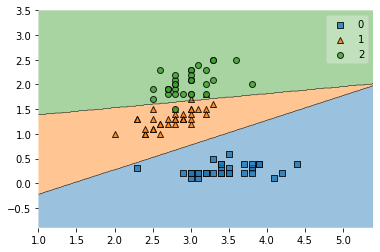

In [ ]:
plot_decision_regions(X=X_train,y=y_train,clf=clf_1,legend=1)

In [ ]:
clf_1.score(X_test,y_test)

0.9333333333333333

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


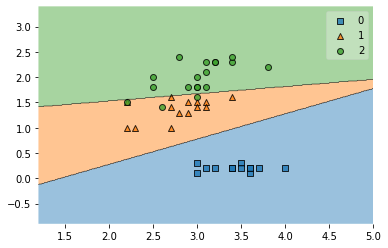

In [ ]:
plot_decision_regions(X=X_test,y=y_test,clf=clf_1,legend=1)

Model Evaluation

In [ ]:
predictions_1=clf_1.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions_1))

[[13  0  0]
 [ 0 14  0]
 [ 0  3 15]]


In [ ]:
print(classification_report(y_test,predictions_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        14
           2       1.00      0.83      0.91        18

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.95      0.93      0.93        45



In [ ]:
sepal_width=iris_1.iloc[ :,1] #model trained on sepal and petal widths
petal_width=iris_1.iloc[ :,3]
X=np.column_stack((sepal_width,petal_width))
y=np.array(iris_1['species'])
d = {'setosa':0, 'versicolor':1, 'virginica':2}
y = np.array(list(map(lambda i : d[i], y)))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
clf_1=svm.SVC(kernel='poly',C=1)
clf_1.fit(X_train,y_train)

SVC(C=1, kernel='poly')

In [ ]:
clf_1.score(X_train,y_train)

0.9523809523809523

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


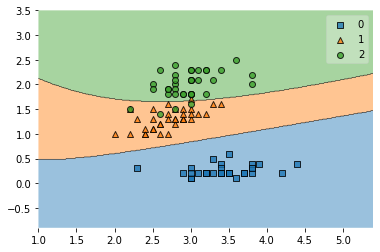

In [ ]:
plot_decision_regions(X=X_train,y=y_train,clf=clf_1,legend=1)

In [ ]:
clf_1.score(X_test,y_test)

0.9777777777777777

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


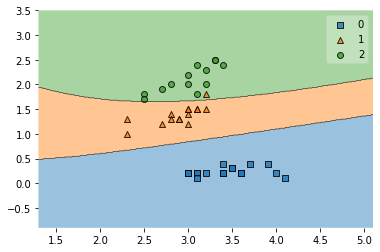

In [ ]:
plot_decision_regions(X=X_test,y=y_test,clf=clf_1,legend=1)

In [ ]:
predictions_1=clf_1.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions_1))

[[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


In [ ]:
print(classification_report(y_test,predictions_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

